Extracting the Necessary Files:-

In [2]:
import zipfile
import os

# Define ZIP file path
zip_path = "/content/drive/MyDrive/Classroom/Artificial_Intelligence/Week-4/Copy of devnagari digit.zip"

# Define a new extraction path with a different name
extract_path = "/content/drive/MyDrive/Classroom/Artificial_Intelligence/Week-4/"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

**Task 1: Data Preparation**
Loading the Data

* Download the provided folder that contains the Devnagari digits dataset.
* Use the Python Imaging Library (PIL) to load and read the image files from the dataset.
* Convert the images into Numpy arrays and normalize them to a range of 0-1.
* use train folder for training and test for testing.
* Extract the corresponding labels for each image.

Hints:
* Ensure that the images are resized to a consistent shape (e.g., 28x28).
* Convert labels to one-hot encoded format for multi-class classification.

Train Data: (17000, 28, 28, 1), Train Labels: (17000, 10)
Test Data: (3000, 28, 28, 1), Test Labels: (3000, 10)


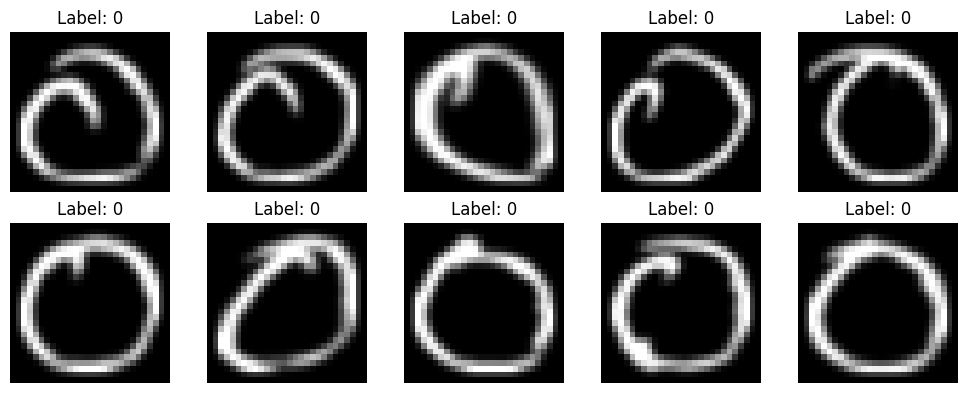

In [10]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define dataset paths
train_dir = os.path.join(extract_path, "DevanagariHandwrittenDigitDataset/Train")
test_dir = os.path.join(extract_path, "DevanagariHandwrittenDigitDataset/Test")

# Define image size
IMG_SIZE = (28, 28)

# Function to load images and labels
def load_data(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Ensure classes are sorted
    class_map = {class_name: idx for idx, class_name in enumerate(class_names)}  # Label encoding

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)

                # Load and preprocess image
                img = Image.open(img_path).convert("L")  # Convert to grayscale
                img = img.resize(IMG_SIZE)  # Resize to 28x28
                img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize to range [0,1]

                images.append(img_array)
                labels.append(class_map[class_name])

    images = np.array(images).reshape(-1, 28, 28, 1)  # Reshape for CNN input
    labels = np.array(labels)

    return images, labels, class_map

# Load train and test data
X_train, y_train, class_map = load_data(train_dir)
X_test, y_test, _ = load_data(test_dir)

# Convert labels to one-hot encoding
num_classes = len(class_map)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print dataset shape
print(f"Train Data: {X_train.shape}, Train Labels: {y_train.shape}")
print(f"Test Data: {X_test.shape}, Test Labels: {y_test.shape}")

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")  # Reshape image for visualization
    plt.title(f"Label: {np.argmax(y_train[i])}")  # Get the actual class label
    plt.axis("off")

plt.tight_layout()
plt.show()

Task 2: Build the FCN Model
Model Architecture
* Create a Sequential model using Keras.
* Add 3 hidden layers with the following number of neurons:

    – 1st hidden layer: 64 neurons

    – 2nd hidden layer: 128 neurons

    – 3rd hidden layer: 256 neurons

* Use sigmoid activation functions for all hidden layers.
* Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the FCN model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 input images

    Dense(64, activation='sigmoid'),  # 1st hidden layer (64 neurons)
    Dense(128, activation='sigmoid'),  # 2nd hidden layer (128 neurons)
    Dense(256, activation='sigmoid'),  # 3rd hidden layer (256 neurons)

    Dense(10, activation='softmax')  # Output layer (10 classes, softmax activation)
])

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Categorical loss for multi-class classification
    metrics=['accuracy']
)

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3: Compile the Model
Model Compilation
* Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [12]:
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer for efficient learning
    loss='categorical_crossentropy',  # Categorical cross-entropy for multi-class classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

print("Model compiled successfully!")

Model compiled successfully!


Task 4: Train the Model
Model Training
* Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.
* Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.
* Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True  # Restore the best weights
)

model_checkpoint = ModelCheckpoint(
    filepath="best_model.h5",  # Save best model
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/20
103/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2853 - loss: 1.9641
Epoch 1: val_loss improved from inf to 7.21934, saving model to best_model.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2949 - loss: 1.9467 - val_accuracy: 0.0000e+00 - val_loss: 7.2193
Epoch 2/20
102/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8048 - loss: 0.6145
Epoch 2: val_loss did not improve from 7.21934
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8061 - loss: 0.6081 - val_accuracy: 0.0000e+00 - val_loss: 8.6582
Epoch 3/20
105/107 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8886 - loss: 0.3284
Epoch 3: val_loss did not improve from 7.21934
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8889 - loss: 0.3278 - val_accuracy: 0.0000e+00 - val_loss: 9.0110
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9355 - loss: 0.2311
Epoch 4: val_loss did not improve from 7.21934
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9355 - loss: 0.2310 - val_accuracy: 0.0000e+00 - val_loss: 9.2105


Task 5: Evaluate the Model
Model Evaluation
* After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.8348
Test Loss: 2.0639
Test Accuracy: 0.6220


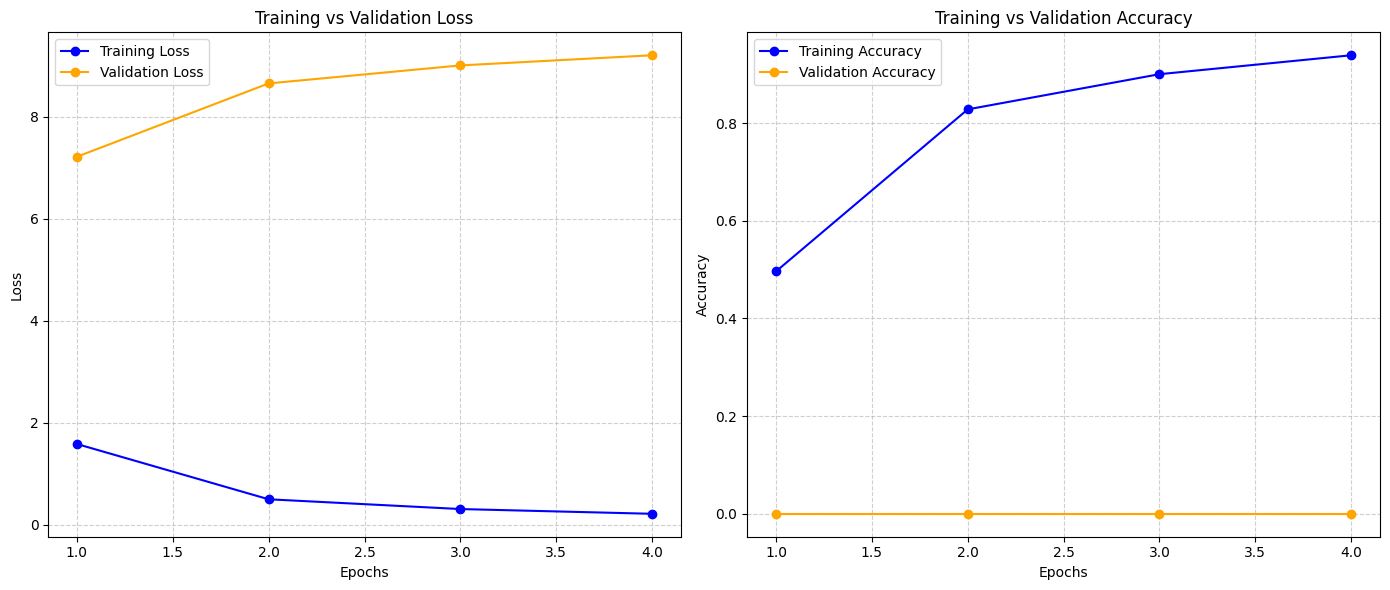

In [19]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Training & Validation Loss
axes[0].plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue', marker='o')
axes[0].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange', marker='o')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Training & Validation Accuracy
axes[1].plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue', marker='o')
axes[1].plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange', marker='o')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Task 6: Save and Load the Model
Model Saving and Loading
* Save the trained model to an .h5 file using model.save().
* Load the saved model and re-evaluate its performance on the test set.

In [17]:
import tensorflow as tf

# Save the trained model to an .h5 file
model.save('devnagari_digit_model.h5')
print("Model saved as 'devnagari_digit_model.h5'")

# Load the saved model
loaded_model = tf.keras.models.load_model('devnagari_digit_model.h5')
print("Model loaded successfully!")

# Re-evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Model saved as 'devnagari_digit_model.h5'
Model loaded successfully!
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7833 - loss: 0.8348
Test Loss: 2.0639
Test Accuracy: 0.6220


Task 7: Predictions
Making Predictions
* Use model.predict() to make predictions on test images.
* Convert the model’s predicted probabilities to digit labels using np.argmax().

In [18]:
import numpy as np

# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Convert predicted probabilities to digit labels using np.argmax()
predicted_labels = np.argmax(predictions, axis=1)

# Print the first 10 predicted labels and the corresponding actual labels
print("Predicted Labels:", predicted_labels[:10])
print("Actual Labels:", np.argmax(y_test[:10], axis=1))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Labels: [0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 0 0 0 0 0 0 0 0 0]


# Adam Optimizer Model

Task 1 - Data Preparation

Training Data Shape: (13600, 784), Validation Shape: (3400, 784), Test Shape: (3000, 784)
One-hot Encoded Labels Shape: (13600, 10)


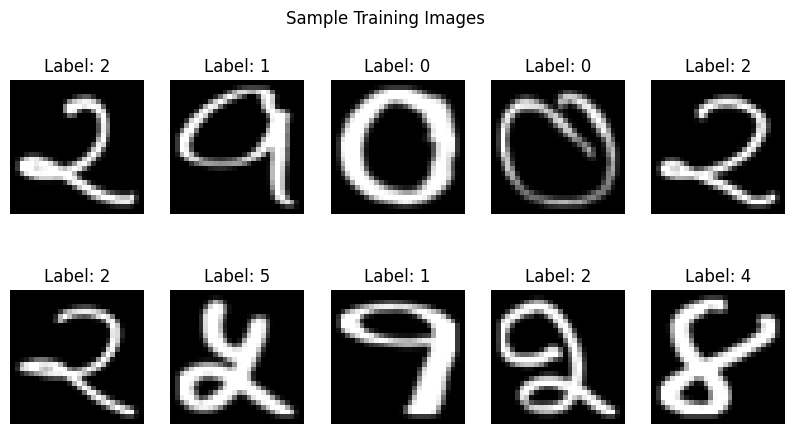

In [20]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

train_dir = os.path.join(extract_path, "DevanagariHandwrittenDigitDataset/Train")
test_dir = os.path.join(extract_path, "DevanagariHandwrittenDigitDataset/Test")

def load_images_from_folder(folder):
    images, labels = [], []
    classes = sorted(os.listdir(folder))
    class_map = {class_name: i for i, class_name in enumerate(classes)}

    for class_name in classes:
        class_folder = os.path.join(folder, class_name)
        if not os.path.isdir(class_folder):
            continue

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            try:
                img = Image.open(image_path).convert('L')
                img = img.resize((28, 28))
                img = np.array(img) / 255.0
                images.append(img)
                labels.append(class_map[class_name])
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    return np.array(images), np.array(labels)

x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training Data Shape: {x_train.shape}, Validation Shape: {x_val.shape}, Test Shape: {x_test.shape}")
print(f"One-hot Encoded Labels Shape: {y_train.shape}")

# Visualization of sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis("off")

plt.suptitle("Sample Training Images")
plt.show()

Task 2 - Building Fully Connected Neural Network Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(28*28,)),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3 - Compiling the Model

In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Task 4 - Train the Model

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2073 - loss: 2.2352 - val_accuracy: 0.6956 - val_loss: 1.3788
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7320 - loss: 1.0874 - val_accuracy: 0.8342 - val_loss: 0.5726
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8458 - loss: 0.4954 - val_accuracy: 0.8827 - val_loss: 0.3799
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9033 - loss: 0.3318 - val_accuracy: 0.9140 - val_loss: 0.3004
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9299 - loss: 0.2600 - val_accuracy: 0.9265 - val_loss: 0.2437
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9486 - loss: 0.1963 - val_accuracy: 0.9456 - val_loss: 0.1972
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9529 - loss: 0.1614 - val_accuracy: 0.9533 - val_loss: 0.1709
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9664 - loss: 0.1287 - val_accuracy: 0.9452 - val_loss:

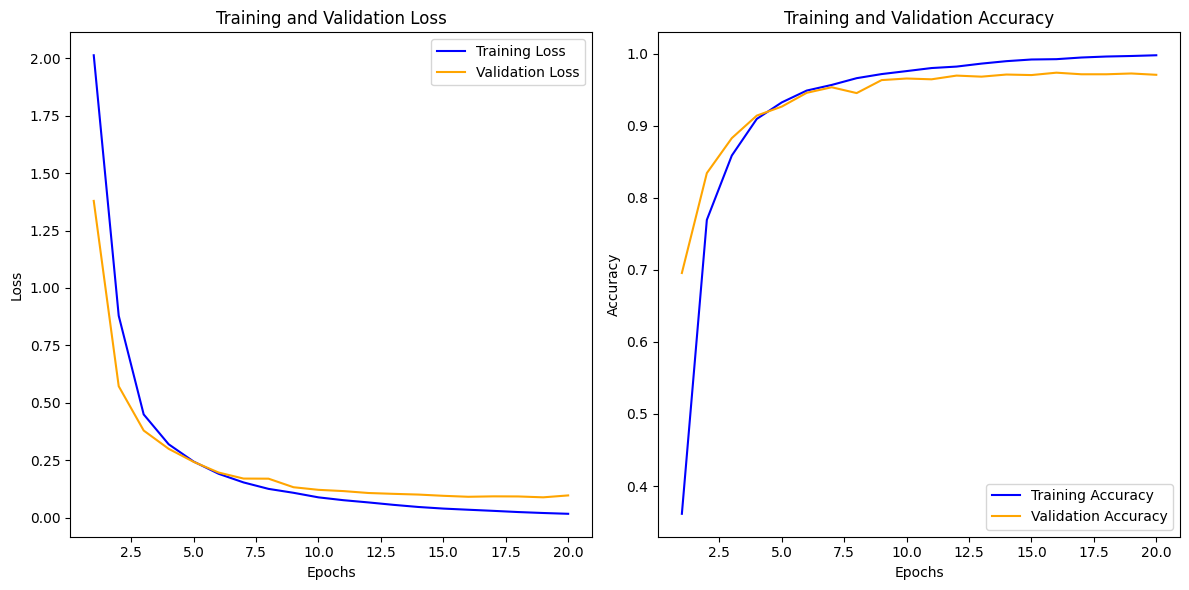

In [23]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks
)

# Plot training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Task 5 - Evaluate the Model

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.9753 - loss: 0.0852
Test Accuracy: 0.9753
Test Loss: 0.0852


Task 6 - Saving and Loading the Model

In [25]:
# Save the model
model.save("devnagari_digit_classifier.h5")
print("Model saved successfully as 'devnagari_digit_classifier.h5'!")

# Load the model
loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.h5")
print("Model loaded successfully!")

# Evaluate the loaded model on the test set
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

Model saved successfully as 'devnagari_digit_classifier.h5'!
Model loaded successfully!
94/94 - 1s - 7ms/step - accuracy: 0.9753 - loss: 0.0852
Loaded Model Test Accuracy: 0.9753
Loaded Model Test Loss: 0.0852


Task 7 - Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


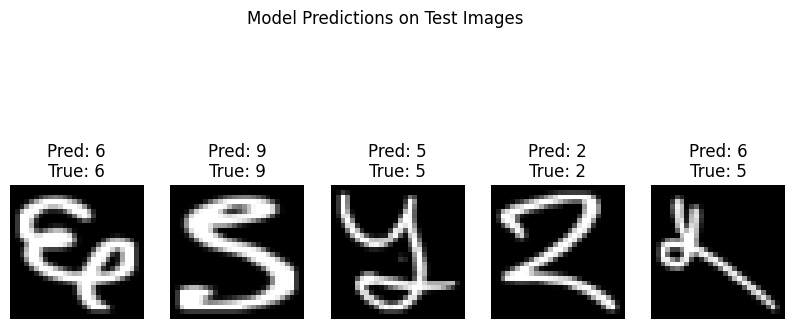

In [26]:
# Randomly sample 5 test images
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

# Make predictions
predictions = loaded_model.predict(sample_images)

# Convert predicted probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

# Visualization of predictions
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis("off")

plt.suptitle("Model Predictions on Test Images")
plt.show()